(540, 2500) (540,)


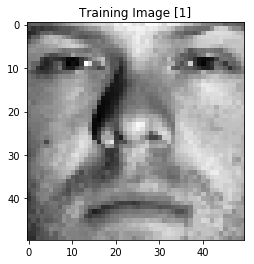

(100, 2500) (100,)


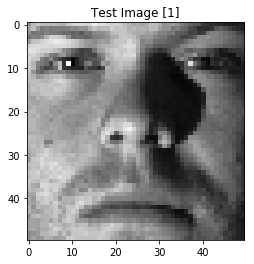

In [8]:
## question b
import numpy as np
import imageio
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
%matplotlib inline


train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print (train_data.shape,train_labels.shape)
plt.imshow(train_data[1, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Training Image [1]')
plt.savefig('Training_Image_[1]')
plt.show()


### for the test data
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print (test_data.shape,test_labels.shape)
plt.imshow(test_data[1, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Test Image [1]')
plt.savefig('Test_Image_[1]')
plt.show()


(2500,)


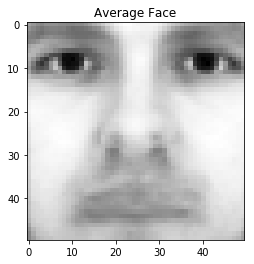

In [9]:
# question c
# Calculate the mean of each column in training data 

average_face = np.mean(train_data, axis = 0)
print(average_face.shape)
plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)
plt.title('Average Face')
plt.savefig('Average_Face')
plt.show()


(540, 2500)


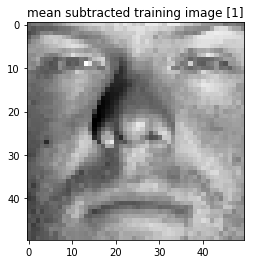

(100, 2500)


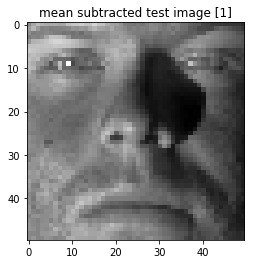

In [10]:
# question d
# define function: subtract the average_face from the train_data
def matrix_subtract_array(train_data,average_face):
    mean_subtracted_data = []
    for row in train_data:
        i=0
        mean_subtracted_face = []
        for pixel in row:
            # for each pixel, subtract the correponding average_face pixel
            mean_subtracted_pixel = pixel - average_face[i]
            mean_subtracted_face.append(mean_subtracted_pixel)
            i = i + 1
        mean_subtracted_data.append(mean_subtracted_face)
    return np.array(mean_subtracted_data, dtype=float)

#####
mean_subtracted_data = matrix_subtract_array(train_data,average_face)
mean_subtracted_test = matrix_subtract_array(test_data,average_face)


# print the second image in mean_subtracted_data 
print (mean_subtracted_data.shape)
plt.imshow(mean_subtracted_data[1,:].reshape(50,50), cmap = cm.Greys_r)
plt.title('mean subtracted training image [1]')
plt.savefig('mean_subtracted_training_image_[1]')
plt.show()


# print the second image in mean_subtracted_test
print (mean_subtracted_test.shape)
plt.imshow(mean_subtracted_test[1,:].reshape(50,50), cmap = cm.Greys_r)
plt.title('mean subtracted test image [1]')
plt.savefig('mean_subtracted_test_image_[1]')
plt.show()


(540, 540) (540,) (540, 2500)


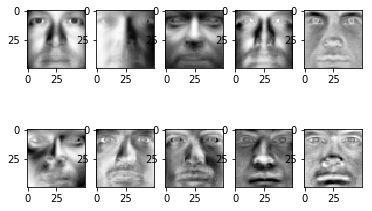

In [11]:
#for question e
u, sigma, v_t = np.linalg.svd(mean_subtracted_data, full_matrices=False)
print(u.shape, sigma.shape, v_t.shape)
#print(u,'\n', sigma, '\n',v_t)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(v_t[i,:].reshape(50,50), cmap = cm.Greys_r)
plt.savefig('Top_10_Eigenfaces')


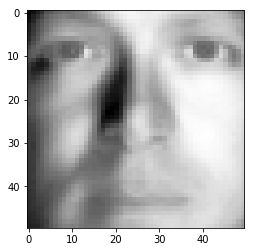

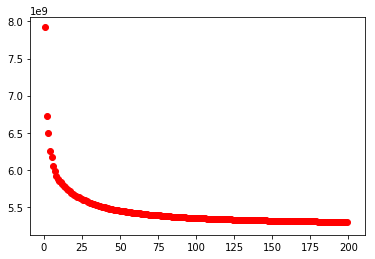

In [15]:
# for question f
# define the function to recover the approximation of trainning data from the first r element of sigma
def x_rank_r(r):
    tmp = []
    tmp = np.dot(u[:,0:r], np.diag(sigma[0:r]))
    #print(np.diag(sigma[0:r]))
    return np.dot(tmp, v_t[0:r,:])

# calculate and plot the rank 2 approximation of the second trainning image
train_data_approximation = x_rank_r(2)
plt.imshow(train_data_approximation[1,:].reshape(50,50), cmap = cm.Greys_r)
plt.show()

## calculate the error for different ranks
error_rank_r = [] 

for r in range(1,200):
    approximation = []
    approximation = x_rank_r(r)
    #print(r)
    #plt.subplot(5,5,r)
    #plt.imshow(approximation[1,:].reshape(50,50), cmap = cm.Greys_r)
    difference = train_data-abs(approximation)
    a = np.linalg.norm(difference)
    error_rank_r.append([r,a*a])

# plot the rank-r approximation error as a function of r 
for element in error_rank_r:
     plt.scatter(element[0],element[1],c='r')
plt.savefig('Rank_r_approximation_error')

        

In [13]:
## for question g
## feature_generator is goint to generate the r dimensional feature matrix for matrix_data 

def feature_generator(matrix_data, matrix_vt, rank_r):
    return np.dot(matrix_data, matrix_vt[0:rank_r,:].transpose())

# generate feature matrix for trainning and test data 
feature_matrix_train = feature_generator(train_data, v_t, 10)
feature_matrix_test = feature_generator(test_data, v_t, 10)

print(feature_matrix_train.shape, feature_matrix_test.shape)

(540, 10) (100, 10)


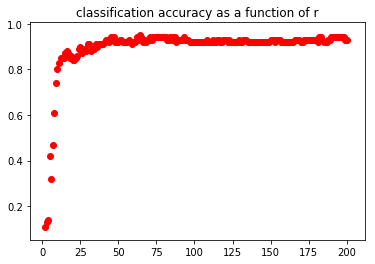

In [14]:
## for question h
## tranform the label so that it can be used in logistic regression;  
## it turned out that we don't need to transform the label. The sklearn supports one-vs-the rest model. 
def get_logistic_label(multi_people_labels,label_number):
    new_label = []
    for i in range(0,len(multi_people_labels)):
        if multi_people_labels[i] == label_number:
            new_label.append(1)
        else:
            new_label.append(0)
    return new_label


## calculate the accuray of the prediction 
def accuracy_calculator(prediction_list, label_list):
    accurate_number = 0
    if len(prediction_list) != len(label_list):
        print('Error. The length of the prediction and label list does not match')
    else:
        for i in range(len(prediction_list)):
            if prediction_list[i] == label_list[i]:
                accurate_number += 1
    
    return accurate_number/len(prediction_list)


accuracy_logistic_on_feature_matrix = []
for r in range(2,201):
    ## get the feature matrix
    train_f_matrix = feature_generator(train_data, v_t, r)
    test_f_matrix = feature_generator(test_data, v_t, r)
    ## run logsistic regression over feature matrix
    clf = LogisticRegression().fit(train_f_matrix,train_labels)
    ## predict using the test_f_matrix
    prediction_on_test = clf.predict(test_f_matrix)
    ## calculate accuracy 
    accuracy = accuracy_calculator(prediction_on_test, test_labels)
    ## append the accuracy of each iteration 
    accuracy_logistic_on_feature_matrix.append([r,accuracy])
    

#print(accuracy_logistic_on_feature_matrix)


for element in accuracy_logistic_on_feature_matrix:
     plt.scatter(element[0],element[1],c='r')

plt.title('classification accuracy as a function of r')
plt.savefig('accuracy_over_r')

